In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
CH9JI = pd.read_csv('./magazine/final/CH9JI_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [4]:
CH9JI['ADFN_2'] = CH9JI['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [5]:
CH9JI['ADFN_2']

0                          [메탈, 레진, 귀고리, CHANEL, CHANEL]
1      [스티치, 디테일, 코튼, 원피스, 로우, 클래식, LOW, CLASSIC, 헤어,...
2      [CHANEL, 케이스, 백, 화이트, 실버, 조합, 시원하고, 세련, CHANEL...
3                               [CHANEL, 블, 리마, 브림, 미스트]
4      [화려하기보다, 사려, 깊은, 미적, 감각, CHANEL, 할펀, 치어스, 아름답다...
                             ...                        
315    [지수, 볼수록, 좋아짐, 성격, 예쁘다, 노래, 노력, 실력, 시킴, 기획사, 마...
316    [지수, 웃긴, 캐릭터, 이상한, 캐릭터, 웃김, 하든, 궁, 시렁, 궁, 시렁, ...
317    [지수, 멘트, 재밌어서, 보고있는, 행복함, 지수, 폭발, ☆, 나와, 줬으면, ...
318    [저녁, 도레미, 마켓, 지수, 소통, 하려구, v, 앱, 켜, 줬으면, 기념, 스...
319    [감도, 쩌, 참도, 글코, 드라마, 주인공, 지수, 패널, 지수, 얼굴, 입덕, ...
Name: ADFN_2, Length: 320, dtype: object

### top50 리스트 생성

In [6]:
top500 = pd.read_csv('./CH9JI_top500.csv', sep='|', encoding = 'utf-8')

In [7]:
top500

,word,count
0,지수,4231
1,예쁘다,1889
2,귀엽다,740
3,CHANEL,601
4,얼굴,521
...,...,...
495,되지,18
496,그것,18
497,갈수록,18
498,짜,18


In [8]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['지수', '예쁘다', '귀엽다', 'CHANEL', '얼굴', '사랑', '노래', '매력', 'DIOR', '목소리', '음악', '스타일', '춤', '아이돌', '브랜드', '모델', '실력', '최고', '라이브', '세계', '성격', '음색', '배우', '블랙', '디자인', '사랑스럽다', '여자', '여신', '외모', '쇼']


In [9]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['지수', '예쁘다', '귀엽다', 'CHANEL', '얼굴', '사랑', '노래', '매력', 'DIOR', '목소리', '음악', '스타일', '춤', '아이돌', '브랜드', '모델', '실력', '최고', '라이브', '세계', '성격', '음색', '배우', '블랙', '디자인', '사랑스럽다', '여자', '여신', '외모', '쇼', '여성', '장식', '드레스', '메이크업', '분위기', '핑크', '백', '무대', 'KARL', '재킷', '새로운', '비주얼', '디자이너', '아름다운', '완성', 'COUTURE', '라인', '하우스', '파리', '패션']


### top100

In [10]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['지수', '예쁘다', '귀엽다', 'CHANEL', '얼굴', '사랑', '노래', '매력', 'DIOR', '목소리', '음악', '스타일', '춤', '아이돌', '브랜드', '모델', '실력', '최고', '라이브', '세계', '성격', '음색', '배우', '블랙', '디자인', '사랑스럽다', '여자', '여신', '외모', '쇼', '여성', '장식', '드레스', '메이크업', '분위기', '핑크', '백', '무대', 'KARL', '재킷', '새로운', '비주얼', '디자이너', '아름다운', '완성', 'COUTURE', '라인', '하우스', '파리', '패션', '팬츠', '다양한', '솔로', '이미지', '레전드', '톱', '데님', '미국', '스타', '걸그룹', '주얼리', '화이트', '코트', '인기', '아이템', '느낌', '레드', '노력', '트위드', '친구', '매치', '가수', '팬', '빛', '드라마', '옷', '입덕', '스커트', '카디건', '화보', '연기', '여름', '보컬', '자연', '코코', 'HAUTE', '시작', '웃음', '셔츠', '한국', '반전', '꽃', '프랑스', '연예인', 'BLINK', '영감', '볼', '뷰티', '천재', '클래식']


In [11]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['지수', '예쁘다', '귀엽다', 'CHANEL', '얼굴', '사랑', '노래', '매력', 'DIOR', '목소리', '음악', '스타일', '춤', '아이돌', '브랜드', '모델', '실력', '최고', '라이브', '세계', '성격', '음색', '배우', '블랙', '디자인', '사랑스럽다', '여자', '여신', '외모', '쇼', '여성', '장식', '드레스', '메이크업', '분위기', '핑크', '백', '무대', 'KARL', '재킷', '새로운', '비주얼', '디자이너', '아름다운', '완성', 'COUTURE', '라인', '하우스', '파리', '패션', '팬츠', '다양한', '솔로', '이미지', '레전드', '톱', '데님', '미국', '스타', '걸그룹', '주얼리', '화이트', '코트', '인기', '아이템', '느낌', '레드', '노력', '트위드', '친구', '매치', '가수', '팬', '빛', '드라마', '옷', '입덕', '스커트', '카디건', '화보', '연기', '여름', '보컬', '자연', '코코', 'HAUTE', '시작', '웃음', '셔츠', '한국', '반전', '꽃', '프랑스', '연예인', 'BLINK', '영감', '볼', '뷰티', '천재', '클래식', '골드', '컬러', '마음', '영화', '인형', '찰떡', 'VIRGINIE', '이야기', '가을', '관심', '어깨', '룩', '소녀', '티셔츠', '럭셔리', '시대', '세', '디렉터', '겨울', '천사', '부츠', '패션계', '입술', '아티스트', '작업', '도전', '크루즈', '미소', '멋있다', '공방', '시크', '코디', '립', '워치', '주인공', '전시', '벨트', '나이', '뉴욕', '패션쇼', '코로나', '실물', '말투', '가방', '착용', '의상', '액세서리', '체인', '향', '삶', '취향', '인터뷰', '발표', '앨범', '숄더', '시선

In [12]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['지수', '예쁘다', '귀엽다', 'CHANEL', '얼굴', '사랑', '노래', '매력', 'DIOR', '목소리', '음악', '스타일', '춤', '아이돌', '브랜드', '모델', '실력', '최고', '라이브', '세계', '성격', '음색', '배우', '블랙', '디자인', '사랑스럽다', '여자', '여신', '외모', '쇼', '여성', '장식', '드레스', '메이크업', '분위기', '핑크', '백', '무대', 'KARL', '재킷', '새로운', '비주얼', '디자이너', '아름다운', '완성', 'COUTURE', '라인', '하우스', '파리', '패션', '팬츠', '다양한', '솔로', '이미지', '레전드', '톱', '데님', '미국', '스타', '걸그룹', '주얼리', '화이트', '코트', '인기', '아이템', '느낌', '레드', '노력', '트위드', '친구', '매치', '가수', '팬', '빛', '드라마', '옷', '입덕', '스커트', '카디건', '화보', '연기', '여름', '보컬', '자연', '코코', 'HAUTE', '시작', '웃음', '셔츠', '한국', '반전', '꽃', '프랑스', '연예인', 'BLINK', '영감', '볼', '뷰티', '천재', '클래식', '골드', '컬러', '마음', '영화', '인형', '찰떡', 'VIRGINIE', '이야기', '가을', '관심', '어깨', '룩', '소녀', '티셔츠', '럭셔리', '시대', '세', '디렉터', '겨울', '천사', '부츠', '패션계', '입술', '아티스트', '작업', '도전', '크루즈', '미소', '멋있다', '공방', '시크', '코디', '립', '워치', '주인공', '전시', '벨트', '나이', '뉴욕', '패션쇼', '코로나', '실물', '말투', '가방', '착용', '의상', '액세서리', '체인', '향', '삶', '취향', '인터뷰', '발표', '앨범', '숄더', '시선

In [13]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['지수', '예쁘다', '귀엽다', 'CHANEL', '얼굴', '사랑', '노래', '매력', 'DIOR', '목소리', '음악', '스타일', '춤', '아이돌', '브랜드', '모델', '실력', '최고', '라이브', '세계', '성격', '음색', '배우', '블랙', '디자인', '사랑스럽다', '여자', '여신', '외모', '쇼', '여성', '장식', '드레스', '메이크업', '분위기', '핑크', '백', '무대', 'KARL', '재킷', '새로운', '비주얼', '디자이너', '아름다운', '완성', 'COUTURE', '라인', '하우스', '파리', '패션', '팬츠', '다양한', '솔로', '이미지', '레전드', '톱', '데님', '미국', '스타', '걸그룹', '주얼리', '화이트', '코트', '인기', '아이템', '느낌', '레드', '노력', '트위드', '친구', '매치', '가수', '팬', '빛', '드라마', '옷', '입덕', '스커트', '카디건', '화보', '연기', '여름', '보컬', '자연', '코코', 'HAUTE', '시작', '웃음', '셔츠', '한국', '반전']


### top50만 남기기

In [14]:
len(CH9JI)

320

In [15]:
top30_word = []
for i in range(len(CH9JI)):
    w=[]
    for word in CH9JI.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [16]:
top50_word = []
for i in range(len(CH9JI)):
    w=[]
    for word in CH9JI.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [17]:
top100_word = []
for i in range(len(CH9JI)):
    w=[]
    for word in CH9JI.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [18]:
top200_word = []
for i in range(len(CH9JI)):
    w=[]
    for word in CH9JI.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [19]:
top300_word = []
for i in range(len(CH9JI)):
    w=[]
    for word in CH9JI.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [20]:
top500_word = []
for i in range(len(CH9JI)):
    w=[]
    for word in CH9JI.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [21]:
CH9JI

,magazine,brand,title,word,ADFN,ADFN_2
0,A,Ch,"가을 트렌드 컬러, 위대한 블랙의 위로","메탈과 레진으로 만든 귀고리는 가격미정, CHANEL(CHANEL).","['메탈', '레진', '귀고리', 'CHANEL', 'CHANEL']","[메탈, 레진, 귀고리, CHANEL, CHANEL]"
1,A,Ch,나도 셀프 웨딩 해볼까? 1,"스티치 디테일 코튼 원피스는 19만8천원, 로우 클래식(LOW CLASSIC). 헤...","['스티치', '디테일', '코튼', '원피스', '로우', '클래식', 'LOW'...","[스티치, 디테일, 코튼, 원피스, 로우, 클래식, LOW, CLASSIC, 헤어,..."
2,A,Ch,셀럽들이 선택한 여름 명품 백은 무엇?,"CHANEL 케이스 5백32만원, 화이트와 실버의 조합은 시원하고 세련됐다. CHA...","['CHANEL', '케이스', '백', '화이트', '실버', '조합', '시원하...","[CHANEL, 케이스, 백, 화이트, 실버, 조합, 시원하고, 세련, CHANEL..."
3,A,Ch,리필되나요? 리필형 뷰티 아이템,4 CHANEL의 수블리마지 라 브림 미스트,"['CHANEL', '블', '리마', '브림', '미스트']","[CHANEL, 블, 리마, 브림, 미스트]"
4,A,Ch,"샤넬부터 할펀까지, 빛나는 모든 것에 대하여.","그저 화려하기보다 사려 깊은 미적 감각으로. CHANEL부터 할펀까지, 빛나는 모든...","['화려하기보다', '사려', '깊은', '미적', '감각', 'CHANEL', '...","[화려하기보다, 사려, 깊은, 미적, 감각, CHANEL, 할펀, 치어스, 아름답다..."
...,...,...,...,...,...,...
315,YOUTUBE,Ji,블랙핑크 지수 실력없다고 왜이래~ 나 블랙핑크야~ 제대로 보여줄게! [All Abo...,['지수 진짜 보면 볼수록 더 좋아짐 성격도 좋고 예쁘다 노래도 잘하고 노력도 많이...,"['지수', '진짜', '보면', '볼수록', '더', '좋아짐', '성격', '도...","[지수, 볼수록, 좋아짐, 성격, 예쁘다, 노래, 노력, 실력, 시킴, 기획사, 마..."
316,YOUTUBE,Ji,사랑스러움지수 한도초과! 🧡지수🖤 모음 3탄! [예능맛ZIP 맛남의 광장_Delic...,['지수 엄청 웃긴 캐릭터라기보다 이상한 캐릭터라서 웃김 ㅋㅋㅋㅋㅋㅋ 다른 BLAC...,"['지수', '엄청', '웃긴', '캐릭터', '라기', '보다', '이상한', '...","[지수, 웃긴, 캐릭터, 이상한, 캐릭터, 웃김, 하든, 궁, 시렁, 궁, 시렁, ..."
317,YOUTUBE,Ji,지수 MBTI는 'CUTE'가 분명해 🧡지수🖤 모음 5탄! [예능맛ZIP 맛남의 광...,"['지수는 멘트하나하나가 넘 재밌어서 보고있는더 행복함^^', '지수 예능 폭발 ☆...","['지수', '는', '멘트', '하', '나', '하나', '가', '넘', '재...","[지수, 멘트, 재밌어서, 보고있는, 행복함, 지수, 폭발, ☆, 나와, 줬으면, ..."
318,YOUTUBE,Ji,지수가 먹지 지수 먹방 영상😎 _ BLACKPINK JISOO_korean_comm...,['오늘 저녁 7시 40분 도레미 마켓에 지수와 로제가 출연합니다! 'BLACKPI...,"['오늘', '저녁', '7시', '40분', '도레미', '마켓', '에', '지...","[저녁, 도레미, 마켓, 지수, 소통, 하려구, v, 앱, 켜, 줬으면, 기념, 스..."


### item 남기기

In [22]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [23]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [24]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [25]:
# len(top100_not_item_word)

In [26]:
# top100_not_item_word[1]

In [27]:
top50_word

[['CHANEL', 'CHANEL'],
 ['라인', 'CHANEL', 'CHANEL'],
 ['CHANEL', '백', 'CHANEL', '백', '배우', '블랙', '매력'],
 ['CHANEL'],
 ['CHANEL',
  '분위기',
  '디자인',
  '드레스',
  '스타일',
  '라인',
  '드레스',
  '드레스',
  '스타일',
  '완성',
  'CHANEL',
  '블랙',
  '장식',
  '완성',
  '세계',
  '하우스',
  '분위기',
  '블랙',
  '드레스',
  '매력'],
 ['블랙', '핑크', 'CHANEL', '쇼', '블랙', '핑크', '쇼', 'CHANEL', '장식', '무대', '쇼', '모델'],
 ['쇼',
  '모델',
  '백',
  '쇼',
  '모델',
  '라인',
  '쇼',
  '장식',
  '스타일',
  '완성',
  'CHANEL',
  '쇼',
  '모델',
  '무대',
  '장식',
  '분위기',
  '완성',
  '라인',
  '매력',
  '분위기',
  '스타일'],
 ['CHANEL'],
 ['CHANEL', 'CHANEL', '분위기', '백', '장식', 'CHANEL'],
 ['CHANEL',
  '백',
  '장식',
  '매력',
  'CHANEL',
  '백',
  '완성',
  '여성',
  '재킷',
  '여성',
  '디자인',
  'CHANEL',
  'CHANEL',
  'CHANEL',
  '블랙',
  '재킷'],
 ['CHANEL', '모델', '디자인', '브랜드', 'CHANEL', '완성', 'CHANEL', '모델'],
 ['CHANEL', 'CHANEL'],
 ['장식', '장식', 'CHANEL', 'CHANEL', 'CHANEL'],
 ['여성', 'CHANEL', '브랜드', '세계', 'COUTURE'],
 ['CHANEL', '장식', '재킷', '라인', '드레스', '스타일', '재킷'],
 ['CHANEL', 'C

In [28]:
len(top50_word)

320

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [29]:
# 어프라이어리(Apriori)
from apyori import apriori

In [30]:
top30_word[0]

['CHANEL', 'CHANEL']

In [39]:
# 지지도(support) : P(A∩B)
result = list(apriori(top200_word, min_support = 0.07))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
303,"(지수, 사랑)",0.218750,"[((), (지수, 사랑), 0.21875, 1.0), ((사랑), (지수), 0....",2
347,"(지수, 얼굴)",0.215625,"[((), (지수, 얼굴), 0.215625, 1.0), ((얼굴), (지수), 0...",2
248,"(지수, 매력)",0.212500,"[((), (지수, 매력), 0.2125, 1.0), ((매력), (지수), 0.7...",2
174,"(지수, DIOR)",0.200000,"[((), (지수, DIOR), 0.2, 1.0), ((DIOR), (지수), 0....",2
143,"(CHANEL, 브랜드)",0.175000,"[((), (CHANEL, 브랜드), 0.175, 1.0), ((CHANEL), (...",2
191,"(귀엽다, 지수)",0.168750,"[((), (귀엽다, 지수), 0.16875, 1.0), ((귀엽다), (지수), ...",2
328,"(지수, 스타일)",0.165625,"[((), (지수, 스타일), 0.165625, 1.0), ((스타일), (지수),...",2
359,"(지수, 예쁘다)",0.162500,"[((), (지수, 예쁘다), 0.1625, 1.0), ((예쁘다), (지수), 1...",2
296,"(얼굴, 사랑)",0.159375,"[((), (얼굴, 사랑), 0.159375, 1.0), ((사랑), (얼굴), 0...",2
365,"(지수, 음악)",0.156250,"[((), (지수, 음악), 0.15625, 1.0), ((음악), (지수), 0....",2


In [40]:
for item in df['items']:
    if '로제' in item:
        print(item)

In [41]:
df[df['items'] == {'리사'}]

,items,support,ordered_statistics,length


### networkx 그래프 정의

In [42]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [43]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [44]:
pos = nx.spring_layout(G)

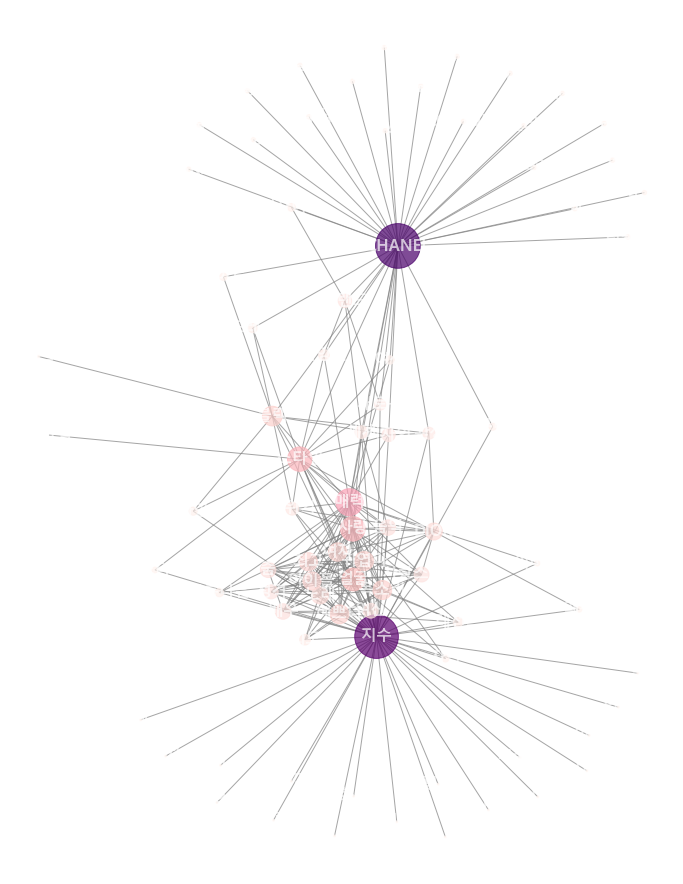

In [45]:
plt.figure(figsize = (12, 16)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./final_img/nt_CH9JI_top200_mis07-w.png', bbox_inches = 'tight', transparent=True)
plt.show()


In [38]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']